## Image Segementation

### Import all necessary modules

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import cv2

plt.rcParams['figure.figsize'] = [20, 10]

### Load the features extracted from the DeepLabV3+ neural network.

In [11]:
feature_map = np.load('feature_map.npy').squeeze(axis=1)
print(feature_map.shape)
n, w, h, d = tuple(feature_map.shape)
feature_map = feature_map.reshape(-1, 1)

(8, 128, 128, 256)


### Select a sample of features to fit a Gaussian Mixture Model with.

In [12]:
sample = feature_map.reshape(n, w*h, d)[1]

### Plot the image of the sample features.

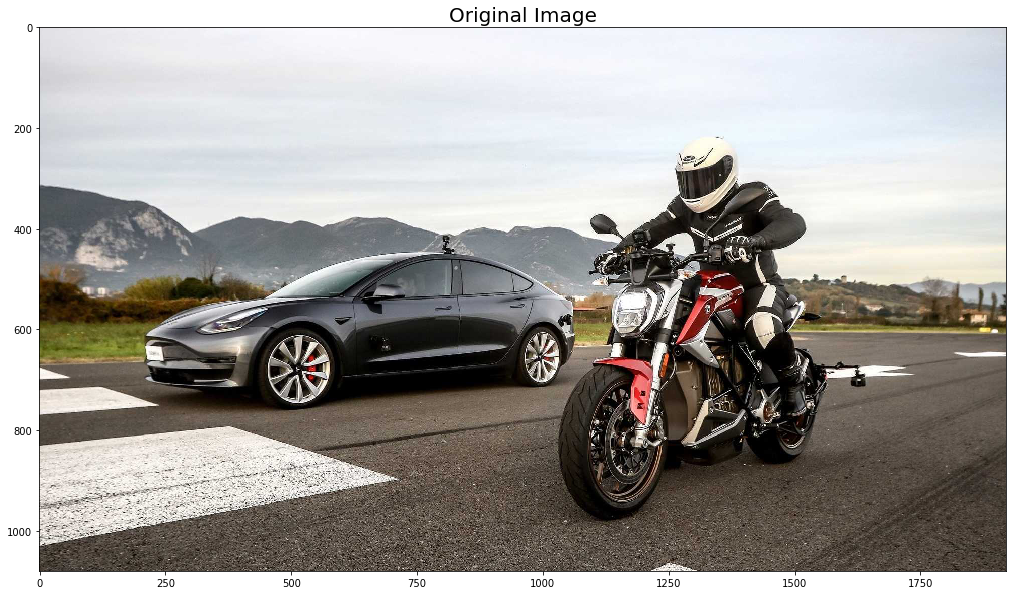

In [13]:
original_image = plt.imread('examples\\bike_and_car.jpg')

plt.imshow(original_image)
plt.title('Original Image', size=20)
plt.show()

### Instantiate the Gaussian Mixture Model for 8 clusters and fit it with the feature subset.

In [14]:
gmm = GaussianMixture(n_components=8)
gmm.fit(feature_map)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=8, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Save the Gaussian Mixture Model using the pickle module.

In [15]:
import pickle
with open('gmm.pkl', 'wb') as output: pickle.dump(gmm, output, pickle.HIGHEST_PROTOCOL)

### Then predict for the sample.

In [16]:
pred = gmm.predict(sample.reshape(-1, 1))

### To plot the result of the predictions use Principal Component Analysis for 3 components.

In [28]:
pca = PCA(n_components = 3)
reduced = pca.fit_transform(pred.reshape(-1, d))

### Resize the result to the dimentions of the original image.

In [29]:
resized = cv2.resize(reduced.reshape(w, h, 3), (original_image.shape[1],original_image.shape[0]))

### Resize the result of the prediction. Plot it next to the original image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


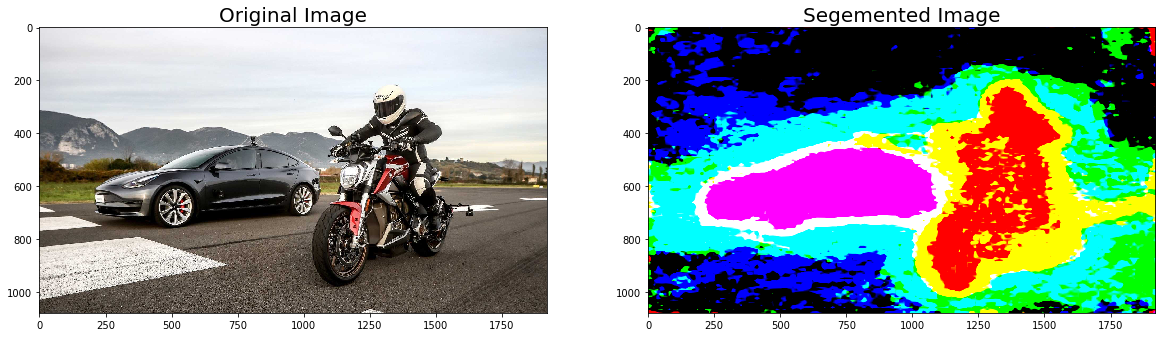

In [30]:
fig=plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1)
plt.title('Original Image', size=20)
plt.imshow(original_image)

fig.add_subplot(1, 2, 2)
plt.title('Segemented Image', size=20)
plt.imshow(resized)
plt.show()